# NF Pipeline Evaluation and Optimization
The goal of this notebook is to compare Andreas' groups CRISPR screen data to the output generated from Nextflow (NF) pipeline developed from Fred Hutchinson's lab and modified by Olga Botnivik. This pipeline uses MaGECK count, test, and rra commands to process FASTQ files and demonstrate significant genes involved in CRISPR KO screens

## 0. Setup

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## 1a. Playing around with count table output from NF pipeline
HAV CRISPR screen uses GeCKO sgRNA library which has 2 sub-libraries (A and B), which were retrieved in separate FASTQ files. The NF pipeline ran distinct FASTQ files for each sub-library, so I wanted to combine the count tables of both sublibraries. 

In [5]:
nextflow_output = '/mnt/ibm_lg/jacklyn.luu/nextflow_output/output/'
path_HAV_treatment_A = nextflow_output + 'HAV_library_A/count/HAV_A_treatment.count.txt'
path_HAV_treatment_B = nextflow_output + 'HAV_library_B/count/HAV_B_treatment.count.txt'

HAV_treatment = pd.concat([pd.read_csv(path_HAV_treatment_A, delimiter = "\t"), 
                           pd.read_csv(path_HAV_treatment_B, delimiter = "\t")])

HAV_treatment['HAV_AB_treatment'] = HAV_treatment.fillna(0)["HAV_A_treatment"] + HAV_treatment.fillna(0)["HAV_B_treatment"]
HAV_treatment = HAV_treatment.drop(['HAV_A_treatment', 'HAV_B_treatment'], axis=1)
HAV_treatment.loc[HAV_treatment['HAV_AB_treatment'] >= 20000]

,sgRNA,Gene,HAV_AB_treatment
8,HGLibA_53798,VPS4A,212984.0
63,HGLibA_53797,VPS4A,89952.0
150,HGLibA_14813,EIF4B,124614.0
444,HGLibA_55015,ZCCHC14,89330.0
463,HGLibA_52861,UGCG,37255.0
601,HGLibA_53796,VPS4A,24336.0
750,HGLibA_55016,ZCCHC14,185159.0
771,HGLibA_14814,EIF4B,81227.0
860,HGLibA_44947,SLC35A1,52254.0
1212,HGLibA_52862,UGCG,60582.0


## 1b. Compare NF pipeline gene summary to output of Andreas' papers 

(Monday July 12, 2021) Retrieve gene summary tables from NF output and previous experimental data from Andreas

In [6]:
# Gene summaries 
path_HAV_A_gene_summary = nextflow_output + 'HAV_library_A/rra/HAV_library_A.gene_summary.txt'
path_HAV_B_gene_summary = nextflow_output + 'HAV_library_B/rra/HAV_library_B.gene_summary.txt'

HAV_A_gene_summary = pd.read_csv(path_HAV_A_gene_summary, delimiter = "\t")
HAV_B_gene_summary = pd.read_csv(path_HAV_B_gene_summary, delimiter = "\t")

HAV_gene_summary = pd.concat([HAV_A_gene_summary, HAV_B_gene_summary])
HAV_gene_summary.sort_values(by=['id'])

,id,num,neg|score,neg|p-value,neg|fdr,neg|rank,neg|goodsgrna,neg|lfc,pos|score,pos|p-value,pos|fdr,pos|rank,pos|goodsgrna,pos|lfc
11377,15-Sep,3,0.568160,0.59860,1.0,11378,1,0.479370,0.089516,0.176450,0.998369,3391,2,0.479370
3677,15-Sep,6,0.090273,0.22912,1.0,3678,3,-0.158420,0.391770,0.611010,1.000000,10478,2,-0.158420
7652,A1BG,3,0.249200,0.37465,1.0,7653,2,-0.176540,0.402170,0.505680,1.000000,10611,1,-0.176540
10126,A1BG,3,0.471180,0.53494,1.0,10127,1,0.050875,0.570060,0.607440,1.000000,11698,1,0.050875
19411,A1CF,3,0.987590,0.98775,1.0,19412,0,1.942800,0.000153,0.000468,0.160038,58,3,1.942800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,hsa-mir-95,4,0.180380,0.32777,1.0,5906,2,-0.147280,0.823540,0.825050,1.000000,17470,1,-0.147280
20157,hsa-mir-96,4,0.944130,0.94398,1.0,20158,0,0.241610,0.123480,0.256920,1.000000,4597,2,0.241610
20353,hsa-mir-98,4,0.952420,0.95230,1.0,20354,0,0.279490,0.140640,0.285880,1.000000,5037,2,0.279490
8442,hsa-mir-99a,4,0.281810,0.42889,1.0,8443,2,-0.111880,0.198220,0.352740,1.000000,6520,1,-0.111880


In [7]:
previous_data_path = '/mnt/ibm_lg/jacklyn.luu/previous_data/'
old_HAV_path = previous_data_path + '/Kulsuptrakul_HAV/mageck_GeckoAB_total_norm.gene_summary.txt' 
old_HAV = pd.read_csv(old_HAV_path, delimiter = "\t")
old_HAV

,id,num,neg|score,neg|p-value,neg|fdr,neg|rank,neg|goodsgrna,neg|lfc,pos|score,pos|p-value,pos|fdr,pos|rank,pos|goodsgrna,pos|lfc
0,VPS4A,6,1.000000e+00,1.000000e+00,1.000000,20915,0,5.9721,4.853800e-22,2.366800e-07,0.000171,1,6,5.9721
1,ZCCHC14,6,1.000000e+00,1.000000e+00,1.000000,20916,0,5.8525,3.969000e-19,2.366800e-07,0.000171,2,6,5.8525
2,PTBP1,6,1.000000e+00,1.000000e+00,1.000000,20906,0,3.7741,2.177700e-15,2.366800e-07,0.000171,3,6,3.7741
3,PDAP1,6,9.966800e-01,9.967500e-01,1.000000,20671,0,4.7964,2.403100e-15,2.366800e-07,0.000171,4,5,4.7964
4,SLC35A1,6,1.000000e+00,1.000000e+00,1.000000,20913,0,5.5413,2.764100e-14,2.366800e-07,0.000171,5,6,5.5413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20911,SUPT4H1,6,7.007800e-07,6.390500e-06,0.008354,15,6,-1.2658,1.000000e+00,1.000000e+00,1.000000,20912,0,-1.2658
20912,IARS2,6,3.622300e-07,3.076900e-06,0.004950,12,6,-2.0255,1.000000e+00,1.000000e+00,1.000000,20913,0,-2.0255
20913,RCBTB1,6,9.809100e-08,1.420100e-06,0.004950,5,6,-1.0557,1.000000e+00,1.000000e+00,1.000000,20914,0,-1.0557
20914,PCBP2,6,5.952600e-08,7.100500e-07,0.003713,3,6,-1.5956,1.000000e+00,1.000000e+00,1.000000,20915,0,-1.5956


### Issue

If GeCKO library is used, then the sub-libraries are sequenced in 2 different FASTQ files. As a result, simply concatenating the gene summary files from 2 different sublibrary will result in 2 rows for each gene used; we cannot compare this incomplete data from previous experimental data.

### Meeting with Andreas

* Each library contains 3 out of 6 guides for all the genes. 
* How to generate enrichment scorese (general steps) 
    1. Given fastq file with guide rna reads 
    2. Count how often the guide RNA appears in the treatments/controls samples
    3. Merge count tables with all 6 guides
    4. Average performance of all 6 guides 


* Next steps: 
    * Look at what normalization method nextflow does
    * Andreas => A + normalize A. B + normalize B

## 2. Let's combine the FASTQ files of sublibrary A and B; then compare between previous data and NF pipeline. 

I made a function to create comparison plots. I'll the output of the NF pipeline and gene summary tables from a custom script that Andreas' group had used for HAV, HCoV-OC43, HCoV-229E, and SARS CoV2. 

In [5]:
correlations = {}

def compare_gene_summary(virus_name, old_path, new_path, attribute):
    """
    INPUTS ============
    * old_path: path to old gene summary
    * new_path: path to new gene summary
    * attribute: thing that you want to compare
    * remove: BOOL to remove NTC 
    OUTPUTS ===========
    *  Graph of attribute scores for old VS new data
    ===================
    This functions compares the attribute between old and new data. 
    """
    
    old_gene_summary = pd.read_csv(old_path, delimiter = "\t")
    new_gene_summary = pd.read_csv(new_path, delimiter = "\t")

    df_compare = pd.merge(old_gene_summary[['id', attribute]].copy(), 
                          new_gene_summary[['id', attribute]].copy(), 
                          how="inner",
                          on='id')
    correlations[virus_name] = (df_compare.iloc[:, 1]).corr(df_compare.iloc[:, 2])
    
    plt.scatter(x = df_compare.iloc[:, 1], 
                y= df_compare.iloc[:, 2])
    plt.xlabel('Old data (%s)' % attribute)
    plt.ylabel('New data (%s)' % attribute)
    plt.title('Comparing %s' %virus_name)

### HAV

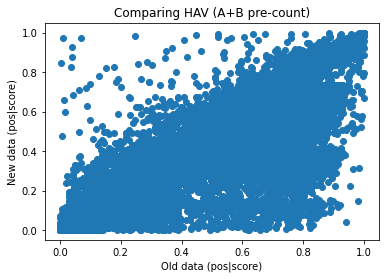

In [6]:
andreas_data_path = '/mnt/ibm_lg/jacklyn.luu/previous_data/'
HAV_old_path = andreas_data_path + 'Kulsuptrakul_HAV/mageck_GeckoAB_total_norm.gene_summary.txt'

output_combined_path = '/mnt/ibm_lg/jacklyn.luu/nextflow_output/output_combined/'
HAV_new_path = output_combined_path + 'HAV/rra/HAV.gene_summary.txt'
compare_gene_summary('HAV (A+B pre-count)', HAV_old_path, HAV_new_path, 'pos|score')

### HCOV-OC43 (Wang)


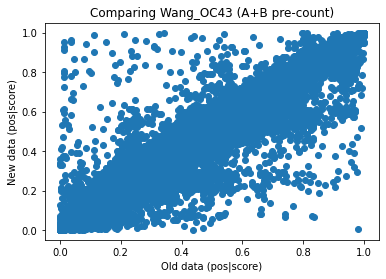

In [7]:
wang_OC43_old_path = andreas_data_path + 'Wang_OC43/OC43_ctrl1_ctrl2_rep1_rep2_mageck.gene_summary.txt'
wang_OC43_new_path_1 = output_combined_path + 'Wang_OC43/rra/Wang_OC43.gene_summary.txt'  
compare_gene_summary('Wang_OC43 (A+B pre-count)', wang_OC43_old_path, wang_OC43_new_path_1, 'pos|score')

### HCOV-229e (Wang)

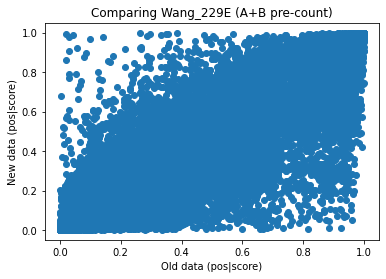

In [15]:
wang_229E_old_path = os.path.join(andreas_data_path, "Wang_229E/229E_replicate1and2_mageck.gene_summary.txt")
wang_229E_new_path_1 = os.path.join(output_combined_path, 'Wang_229E/rra/Wang_229E.gene_summary.txt')
compare_gene_summary('Wang_229E (A+B pre-count)', wang_229E_old_path, wang_229E_new_path_1, 'pos|score')

### SARS-CoV2 (Wang)


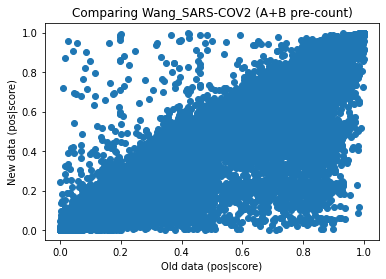

In [8]:
wang_SARS_COV2_old_path = os.path.join(andreas_data_path, 
                                       "Wang_SARS-CoV2/SARS_COV2_MAGECK_total_mageck.gene_summary.txt")
wang_SARS_COV2_new_path_1 = os.path.join(output_combined_path, 
                                                    'Wang_SARS-CoV2/rra/Wang_SARS-CoV2.gene_summary.txt')

SARS_COV2_graph1 = compare_gene_summary('Wang_SARS-COV2 (A+B pre-count)', wang_SARS_COV2_old_path, wang_SARS_COV2_new_path_1, 'pos|score')


## 3. Add total normalization parameter instead of median in mageck_test_ntc
This goal of this attempt is to reproduce the work from step 2, but with 2 changes with the pipeline arguments
1. Use a different normalization method where --norm-method == total
2. Include non targeting control sgRNA's 

(Replicated from Line 63 in NF pipeline https://github.com/FredHutch/crispr-screen-nf/blob/9f05cf7de9586b2121fcf6101288088f39c46430/modules.nf#L31)

The makefile used for this method can be found in /ds-infected-cell-summer/workflows/makefile_072321 and it's similar to this


In [ ]:
mageck test \
    -k ${counts_tsv} \
    -t "\$(cat ${treatment_samples})" \
    -c "\$(cat ${control_samples})" \
    -n "${params.output_prefix}" \
    --control-sgrna ${ntc_list} \
    --norm-method total

In [37]:
# NTC_list is extreacted from the library used. Save onto server
gecko_lib = os.path.join('/mnt/ibm_lg/jacklyn.luu/fastqs_combined','Human_GeCKOv2_Library_combine.csv')
list_gecko = pd.read_csv(gecko_lib, delimiter = ",", names=['sgRNA', 'sequence', 'Gene'])
ntc_list_gecko = list_gecko['sgRNA'][list_gecko['Gene'].str.contains('NonTargetingControl')]
np.savetxt('ntc_list_gecko.txt', ntc_list_gecko, delimiter='\t', fmt='%s')

After rerunning the CRISPR screen mageck pipeline, now let's see the comparison between new pipeline and old Andreas data

### HAV

NF pipeline with total normalization VS Andreas data


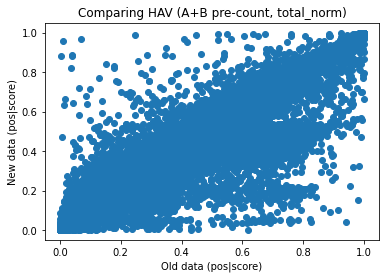

In [9]:
new_output_path = '/mnt/ibm_lg/jacklyn.luu/nextflow_output/output_072321'
HAV_new_path_2 = os.path.join(new_output_path, 'HAV/rra/HAV.gene_summary.txt')
print("NF pipeline with total normalization VS Andreas data")
compare_gene_summary('HAV (A+B pre-count, total_norm)', HAV_old_path, HAV_new_path_2, 'pos|score')

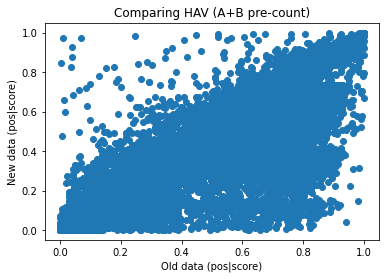

In [10]:
compare_gene_summary('HAV (A+B pre-count)', HAV_old_path, HAV_new_path, 'pos|score')

### HCoV 43 (Wang)

NF pipeline with total normalization VS Andreas data


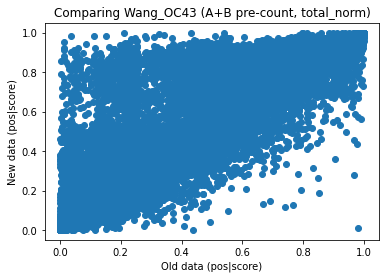

In [11]:
wang_OC43_old_path = os.path.join(andreas_data_path, "Wang_OC43/OC43_ctrl1_ctrl2_rep1_rep2_mageck.gene_summary.txt")
wang_OC43_new_path_2 = os.path.join(new_output_path, 'Wang_OC43/rra/Wang_OC43.gene_summary.txt')    
print("NF pipeline with total normalization VS Andreas data")
compare_gene_summary('Wang_OC43 (A+B pre-count, total_norm)', wang_OC43_old_path, wang_OC43_new_path_2, 'pos|score')

NF pipeline with median normalization VS Andreas data


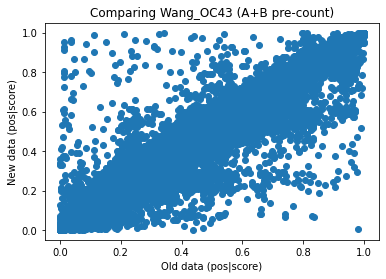

In [12]:
print("NF pipeline with median normalization VS Andreas data")
compare_gene_summary('Wang_OC43 (A+B pre-count)', wang_OC43_old_path, wang_OC43_new_path_1, 'pos|score')

### HCoV 229E (Wang)

NF pipeline with total normalization VS Andreas data


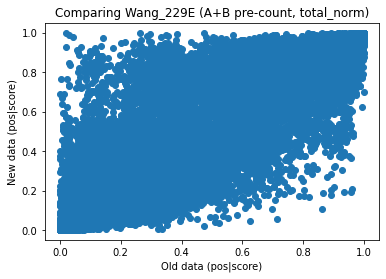

In [13]:
wang_229E_old_path = os.path.join(andreas_data_path, "Wang_229E/229E_replicate1and2_mageck.gene_summary.txt")
wang_229E_new_path_2 = os.path.join(new_output_path, 'Wang_229E/rra/Wang_229E.gene_summary.txt')
print("NF pipeline with total normalization VS Andreas data")
compare_gene_summary('Wang_229E (A+B pre-count, total_norm)', wang_229E_old_path, wang_229E_new_path_2, 'pos|score')

NF pipeline with median normalization VS Andreas data


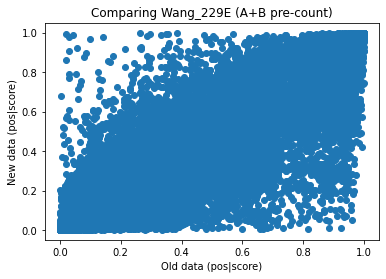

In [16]:
print("NF pipeline with median normalization VS Andreas data")
compare_gene_summary('Wang_229E (A+B pre-count)', wang_229E_old_path, wang_229E_new_path_1, 'pos|score')

### SARS CoV2 (Wang)

NF pipeline with total normalization VS Andreas data


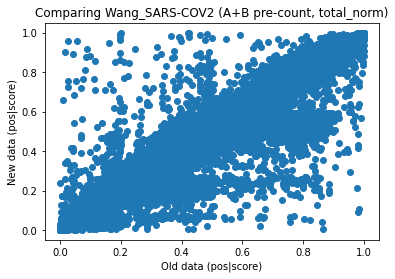

In [17]:
wang_SARS_COV2_old_path = os.path.join(andreas_data_path, 
                                       "Wang_SARS-CoV2/SARS_COV2_MAGECK_total_mageck.gene_summary.txt")
wang_SARS_COV2_new_path_2 = os.path.join(new_output_path, 
                                                    'Wang_SARS-CoV2/rra/Wang_SARS-CoV2.gene_summary.txt')
print("NF pipeline with total normalization VS Andreas data")
compare_gene_summary('Wang_SARS-COV2 (A+B pre-count, total_norm)', wang_SARS_COV2_old_path, wang_SARS_COV2_new_path_2, 'pos|score')

NF pipeline with median normalization VS Andreas data


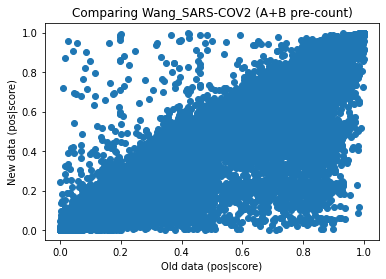

In [18]:
print("NF pipeline with median normalization VS Andreas data")
compare_gene_summary('Wang_SARS-COV2 (A+B pre-count)', wang_SARS_COV2_old_path, wang_SARS_COV2_new_path_1, 'pos|score')

In [19]:
for k, v in sorted(correlations.items(), key=lambda t: str(t[0])):
    print(k,v)

HAV (A+B pre-count) 0.8888908614101317
HAV (A+B pre-count, total_norm) 0.9392440059717903
Wang_229E (A+B pre-count) 0.8536510839762893
Wang_229E (A+B pre-count, total_norm) 0.8581404616610474
Wang_OC43 (A+B pre-count) 0.959444210744353
Wang_OC43 (A+B pre-count, total_norm) 0.8865776596982807
Wang_SARS-COV2 (A+B pre-count) 0.8867294762540077
Wang_SARS-COV2 (A+B pre-count, total_norm) 0.9521171559816581


## Observations so far
Overall, there seems to be a positive correlation between the pos|score between the NF pipeline and the custom script from Andreas' group. However, there seems to be a lot of deviations that needs to be investigated further. 

Re-running the nextflow pipeline using total normalization improved the NF pipeline for HAV and SARS-CoV2; however, it remained same for HCOV 229E and deteriorated for HCOV OC43. 

## 4. Let's merge separate count tables of sublibraries 

Notes from Andreas
* For the original analysis pipeline, we counted sgRNA reads from fastq files with a custom script (not the MaGECK count function). But I think it is ok to move the new pipeline entirely to MaGECK including the count function although there can be small differences in alignment across different alignment tools.

* Following the generation of the count tables, we performed the following commands:

`mageck test -k dengue_mageck_input.txt -t dengue -c control --norm-method total --sort-criteria pos -n mageck`

* One other thing to keep in mind is that for the GeCKO2 libraries, we performed read alignment for the sublibraries A and B separately and then merged the count tables before performing the mageck test command. Since the normalization might be slightly different for the two sublibraries. It depends on the number of reads you get and we can never pool them together perfectly at a 1:1 ratio, there might be a slight skew here as well. That’s why we generally merged after normalization with a custom script instead of using the mageck total norm-method.  So this is another place where we might get small differences between the original custom pipeline and the new MaGeCK pipeline. But overall this should not (hugely) impact the identified top hits or their rank. For other CRISPR libraries without sublibraries this should not be an issue.

<b>Next idea: try to merge count tables for sublibraries A and B before running the above `mageck test` command.</b> 
* Separate fastq files are found here `/mnt/ibm_lg/jacklyn.luu/nextflow_output/output`
* Viruses to run (HAV, HCoV 43 (Wang), HCoV 229E (Wang), SARS CoV2 (Wang)) 

In [3]:
# Merge count tables for sublibraries fastq files 
HAV_A_treatment = pd.read_csv("/mnt/ibm_lg/jacklyn.luu/nextflow_output/output/HAV_library_A/count/HAV_A_treatment.count.txt", 
                              delimiter = "\t")
HAV_A_control = pd.read_csv("/mnt/ibm_lg/jacklyn.luu/nextflow_output/output/HAV_library_A/count/HAV_A_control.count.txt", 
                              delimiter = "\t")
HAV_B_treatment = pd.read_csv("/mnt/ibm_lg/jacklyn.luu/nextflow_output/output/HAV_library_B/count/HAV_B_treatment.count.txt", 
                              delimiter = "\t")
HAV_B_control = pd.read_csv("/mnt/ibm_lg/jacklyn.luu/nextflow_output/output/HAV_library_B/count/HAV_B_control.count.txt", 
                              delimiter = "\t")
for df in [HAV_A_treatment, HAV_B_treatment]:
    df.columns = ["sgRNA", "Gene", "treatment"]
for df in [HAV_A_control, HAV_B_control]:
    df.columns = ["sgRNA", "Gene", "control"]

In [4]:
HAV_A_treatment.sort_values(by="sgRNA")

,sgRNA,Gene,treatment
30169,HGLibA_00001,A1BG,946
26209,HGLibA_00002,A1BG,372
23255,HGLibA_00003,A1BG,1324
4957,HGLibA_00004,A1CF,5278
4551,HGLibA_00005,A1CF,3823
...,...,...,...
37732,HGLibA_65379,NonTargetingControlGuideForHuman_0996,2021
54082,HGLibA_65380,NonTargetingControlGuideForHuman_0997,529
30430,HGLibA_65381,NonTargetingControlGuideForHuman_0998,1118
14726,HGLibA_65382,NonTargetingControlGuideForHuman_0999,619


In [151]:
HAV_B_treatment.sort_values(by="sgRNA")

,sgRNA,Gene,treatment
16356,HGLibB_00001,A1BG,1395
13359,HGLibB_00002,A1BG,808
911,HGLibB_00003,A1BG,3272
482,HGLibB_00004,A1CF,7831
36517,HGLibB_00005,A1CF,761
...,...,...,...
15023,HGLibB_58024,NonTargetingControlGuideForHuman_0996,601
2069,HGLibB_58025,NonTargetingControlGuideForHuman_0997,1674
15762,HGLibB_58026,NonTargetingControlGuideForHuman_0998,2785
10101,HGLibB_58027,NonTargetingControlGuideForHuman_0999,179


In [152]:
gecko_lib = pd.read_csv("/mnt/ibm_lg/jacklyn.luu/fastqs_combined/Human_GeCKOv2_Library_combine.csv", 
                        header=None)
gecko_lib.columns = ["sgRNA", "sequence", "Gene"]
gecko_lib

,sgRNA,sequence,Gene
0,HGLibA_00001,GTCGCTGAGCTCCGATTCGA,A1BG
1,HGLibA_00002,ACCTGTAGTTGCCGGCGTGC,A1BG
2,HGLibA_00003,CGTCAGCGTCACATTGGCCA,A1BG
3,HGLibA_00004,CGCGCACTGGTCCAGCGCAC,A1CF
4,HGLibA_00005,CCAAGCTATATCCTGTGCGC,A1CF
...,...,...,...
123406,HGLibB_58024,ATATTTTATGACATAAAAAT,NonTargetingControlGuideForHuman_0996
123407,HGLibB_58025,TAAACAAAAAGGAAATAGTT,NonTargetingControlGuideForHuman_0997
123408,HGLibB_58026,TTTCCCATGATCATTTAGTG,NonTargetingControlGuideForHuman_0998
123409,HGLibB_58027,CTGAGTGAAAAATAAAAGTT,NonTargetingControlGuideForHuman_0999


In [21]:
HAV_combined = HAV_A_treatment.merge(HAV_A_control, how="left")
HAV_combined = pd.concat([HAV_combined, HAV_B_treatment.merge(HAV_B_control, how="left")])

#HAV_combined.to_csv("/mnt/ibm_lg/jacklyn.luu/nf_eval_optimize/HAV.count.txt", index=False, sep="\t")
HAV_combined

,sgRNA,Gene,treatment,control
0,HGLibA_19090,GIMAP8,1005,1567
1,HGLibA_53888,VTI1A,3519,4890
2,HGLibA_15717,EXD1,457,487
3,HGLibA_59754,hsa-mir-4262,1079,1119
4,HGLibA_19618,GOLGA6L1,1773,1982
...,...,...,...,...
56864,HGLibB_57316,NonTargetingControlGuideForHuman_0288,0,17
56865,HGLibB_57481,NonTargetingControlGuideForHuman_0453,0,10
56866,HGLibB_57651,NonTargetingControlGuideForHuman_0623,0,0
56867,HGLibB_57727,NonTargetingControlGuideForHuman_0699,0,18


TO DO: 
1. Mageck test (maybe create a folder for nf pipeline validation)
2. Graph and correlation fo HAV
3. Make function to do remaining other viruses
4. If this works, potentially optimize pipeline code to account for GeCKO library 


In [ ]:
# Run the following command in terminal in appropriate directory
!mageck test -k HAV.count.txt -t treatment -c control --norm-method total --sort-criteria pos -n mageck

Merged count tables w/ total normalization 0.9461055504772207
Merged fastq files w/ total normalization 0.9392440059717903
Merged fastq files w/ median normalization 0.8888908614101317


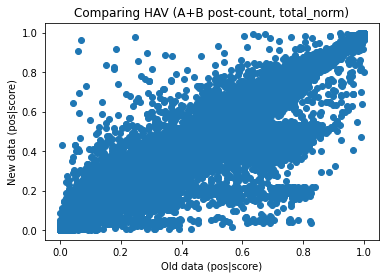

In [22]:
compare_gene_summary('HAV (A+B post-count, total_norm)', 
                     HAV_old_path, 
                     "/mnt/ibm_lg/jacklyn.luu/nf_eval_optimize/mageck.gene_summary.txt", 
                     'pos|score')
print("Merged count tables w/ total normalization", correlations["HAV (A+B post-count, total_norm)"])
print("Merged fastq files w/ total normalization", correlations["HAV (A+B pre-count, total_norm)"])
print("Merged fastq files w/ median normalization", correlations["HAV (A+B pre-count)"])

### Observations

It seems merging the count tables and then performing `mageck test` command slightly improved results for HAV. 

## 5. Next steps

Now I would like to try readjusting the actualy crispr-screen-nf pipeline to include the following arguments from Andreas' custom script:

`mageck count -l GeCKO_A_Mageck_ref.csv -n count_HAV_A_mageck_run2 --fastq Huh751_ctrl_A_S1_R1_001.fastq.gz Huh751_HAV_A_S3_R1_001.fastq.gz --norm-method total`

* --norm-method total

`#remove header row from "B" count file:
tail -n+2 count_HAV_B_mageck_run2.count_normalized.txt > count_HAV_B_mageck_run2.count_normalized_n2.txt`

`#Concatemerize A file and B file without header
cat count_HAV_A_mageck_run2.count_normalized.txt count_HAV_B_mageck_run2.count_normalized_n2.txt >count_HAV_AB_merged_run2.txt`

`mageck test -k count_HAV_AB_merged_run2.txt -t 1 -c 0 --norm-method none --sort-criteria pos -n mageck_norm-none`
* --norm-method none 
* --sort-criteria pos

These adjustments will be found in https://github.com/jhluu/crispr-screen-nf => modules.nf